# Steps
1. Import persistent Training csv
2. Import non persistent Training csv
3. Drop benign data from persistent and non-persistent
4. Rename all labels in persistent sets to 'Persistent'
5. Rename all labels in non persistent set to 'Non persistent'
6. Combine the persistent and non persistent datasets
7. Train autogluon model
8. Test model
9. Check leaderboard
10. Check feature importance
11. Export model

# Imports

In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

# Import persistent and non persistent training sets

In [3]:
persistent_train = pd.read_csv('unraveled_training.csv')
non_persistent_train = pd.read_csv('cic_ids_2017_train.csv')

# Remove benign data from persistent

In [4]:
no_benign_mask = persistent_train['Label'] != 'Benign'
persistent_train = persistent_train[no_benign_mask]

# Remove benign data from non-persistent

In [5]:
no_benign_mask = non_persistent_train['Label'] != 'BENIGN'
non_persistent_train = non_persistent_train[no_benign_mask]

# Label all persistent threats as Persistent

<Axes: >

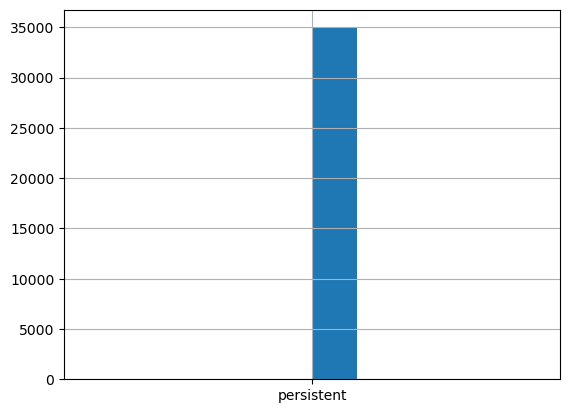

In [7]:
persistent_train['Label'] = 'persistent'
persistent_train['Label'].hist()

# Label all non persistent threats as non persistent

<Axes: >

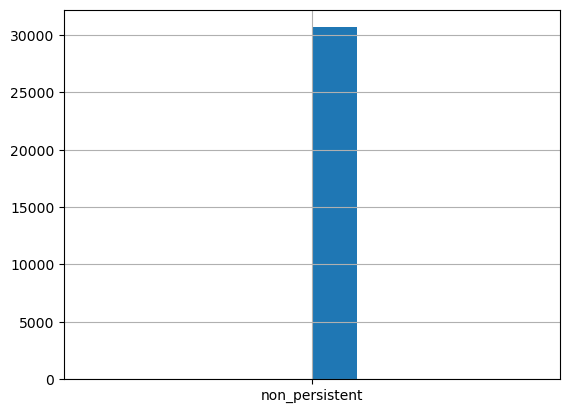

In [8]:
non_persistent_train['Label'] = 'non_persistent'
non_persistent_train['Label'].hist()

# Combine persistent and non persistent datasets

<Axes: >

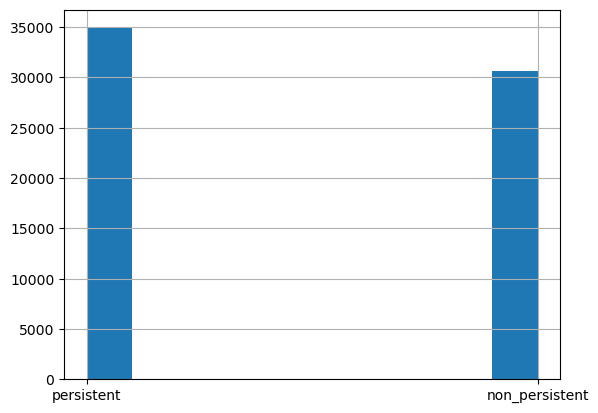

In [9]:
combined_train_df = pd.concat([persistent_train, non_persistent_train])
combined_train_df['Label'].hist()

# Setup Autogluon - train model

In [11]:
predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(combined_train_df, fit_weighted_ensemble=False, time_limit=300)

No path specified. Models will be saved in: "AutogluonModels/ag-20250521_070343"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.4.0: Fri Apr 11 18:32:05 PDT 2025; root:xnu-11417.101.15~117/RELEASE_ARM64_T8132
CPU Count:          10
Memory Avail:       3.91 GB / 16.00 GB (24.5%)
Disk Space Avail:   150.18 GB / 460.43 GB (32.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize a

# Import testing set persistent and non persistent

In [12]:
persistent_test = pd.read_csv('unraveled_testing.csv')
non_persistent_test = pd.read_csv('cic_ids_2017_test.csv')

# Remove benign data from test

<Axes: >

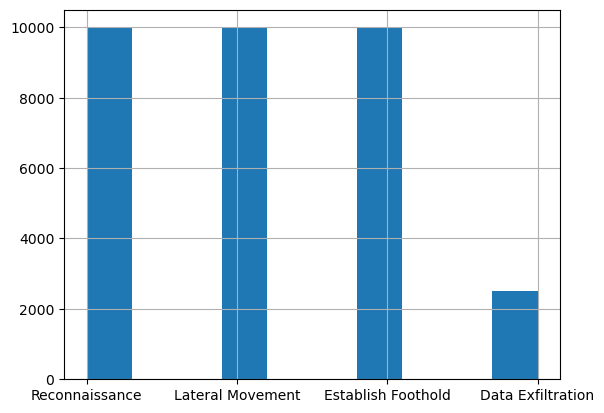

In [17]:
no_benign_mask = persistent_test['Label'] != 'Benign'
persistent_test = persistent_test[no_benign_mask]
no_benign_mask = non_persistent_test['Label'] != 'BENIGN'
non_persistent_test = non_persistent_test[no_benign_mask]
persistent_test['Label'].hist()


# Change all persistent threat labels to persistent and non persistent to non persistent

In [18]:
persistent_test['Label'] = 'persistent'
non_persistent_test['Label'] = 'non_persistent'

# Combine the test persistent and non persistent threats

<Axes: >

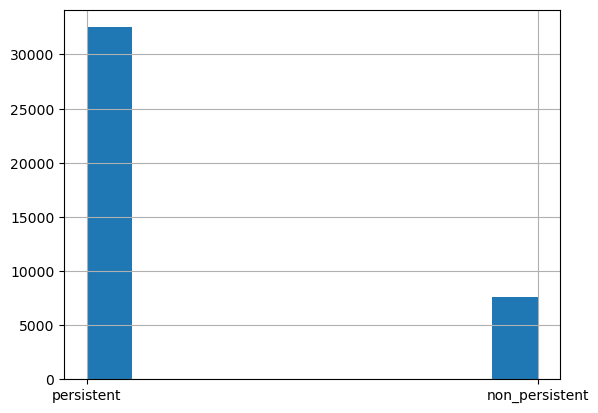

In [20]:
combined_test_df = pd.concat([persistent_test, non_persistent_test])
combined_test_df['Label'].hist()

# Test model using leaderboard and test set

In [21]:
predictor.leaderboard(combined_test_df)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,1.000000,1.000000,mcc,0.003242,0.000483,0.206835,0.003242,0.000483,0.206835,1,True,4
1,LightGBMLarge,1.000000,1.000000,mcc,0.004046,0.000465,0.255047,0.004046,0.000465,0.255047,1,True,13
2,LightGBMXT,1.000000,1.000000,mcc,0.004868,0.000463,0.437401,0.004868,0.000463,0.437401,1,True,3
3,CatBoost,1.000000,1.000000,mcc,0.009821,0.001283,3.551083,0.009821,0.001283,3.551083,1,True,7
4,XGBoost,1.000000,1.000000,mcc,0.034156,0.002730,0.232873,0.034156,0.002730,0.232873,1,True,11
5,RandomForestEntr,1.000000,1.000000,mcc,0.044085,0.026953,0.914030,0.044085,0.026953,0.914030,1,True,6
6,RandomForestGini,1.000000,1.000000,mcc,0.045623,0.026854,1.052370,0.045623,0.026854,1.052370,1,True,5
7,ExtraTreesEntr,1.000000,1.000000,mcc,0.054609,0.026388,0.547275,0.054609,0.026388,0.547275,1,True,9
8,ExtraTreesGini,1.000000,1.000000,mcc,0.057604,0.026531,0.532332,0.057604,0.026531,0.532332,1,True,8
9,NeuralNetTorch,1.000000,1.000000,mcc,0.225906,0.020574,19.714638,0.225906,0.020574,19.714638,1,True,12


# Export model

In [22]:
# will return the path to the cloned predictor, identical to save_path_clone_opt
path_clone_opt = predictor.clone_for_deployment(path='persistent_non_persistent_model')

Cloned TabularPredictor located in '/Users/navya/Documents/Uni/Repos/modular_ids_framework/AutogluonModels/ag-20250521_070343' to 'persistent_non_persistent_model'.
	To load the cloned predictor: predictor_clone = TabularPredictor.load(path="persistent_non_persistent_model")
Clone: Keeping minimum set of models required to predict with best model 'LightGBMXT'...
Deleting model KNeighborsUnif. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_non_persistent_model/models/KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_non_persistent_model/models/KNeighborsDist will be removed.
Deleting model LightGBM. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_non_persistent_model/models/LightGBM will be removed.
Deleting model RandomForestGini. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_non_persisten